# Convert test niftii to numpys

Download all chunks of test data first, put them in a folder `test_volumes` which it iteself in the `dataset` folder. Run all cells.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import os, sys
sys.path.insert(0,"..") 
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import numpy as np

from dataloader.dataloader import process_scan, ImageCLEFDataset, Dataloder

ROOT_DIR = os.path.abspath("../")
DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

# test_volumes is made manually and all
# 421 *.nii files are moved there.
TEST_DATA_PATH = os.path.join(DATASET_PATH, "test_volumes")
TEST_DATA_VOL_PATHS = [ os.path.join(TEST_DATA_PATH, x) for x in sorted(os.listdir(TEST_DATA_PATH))]
print(TEST_DATA_VOL_PATHS[:3])

Using TensorFlow backend.


['/home/hz/tbt-classification/dataset/test_volumes/TST_0001.nii.gz', '/home/hz/tbt-classification/dataset/test_volumes/TST_0002.nii.gz', '/home/hz/tbt-classification/dataset/test_volumes/TST_0003.nii.gz']


In [3]:
PATIENT_NAMES = sorted(os.listdir(TEST_DATA_PATH))
PATIENT_NAMES[:4]

['TST_0001.nii.gz', 'TST_0002.nii.gz', 'TST_0003.nii.gz', 'TST_0004.nii.gz']

In [4]:
# Make new output folder
DEST_PATH = os.path.join(ROOT_DIR, "dataset/test_volumes_numpy")
if not os.path.exists(DEST_PATH):
    os.mkdir(DEST_PATH)

In [5]:
idx = 1
for path in tqdm(TEST_DATA_VOL_PATHS):
    img = process_scan(path)
    img = np.moveaxis(img, -1, 0)
    img = np.expand_dims(img, axis=3)
    np.save("{}/{}.npy".format(DEST_PATH, idx), img)
    idx+=1

 58%|█████▊    | 246/421 [22:21<16:58,  5.82s/it]../dataloader/dataloader.py:30: RuntimeWarning: invalid value encountered in less
  volume[volume < min] = min
../dataloader/dataloader.py:31: RuntimeWarning: invalid value encountered in greater
  volume[volume > max] = max
../dataloader/dataloader.py:59: RuntimeWarning: invalid value encountered in less
  img[img < 0] = 0
../dataloader/dataloader.py:60: RuntimeWarning: invalid value encountered in greater
  img[img > 1] = 1
100%|██████████| 421/421 [37:54<00:00,  5.40s/it]


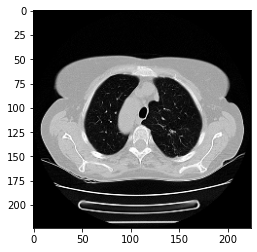

In [6]:
image = np.squeeze(img)
#plt.imshow(image[:,:,55], cmap='gray') # channels last
plt.imshow(image[55], cmap='gray') # channels first

In [7]:
def plot_slices(num_rows, num_columns, width, height, channels, video):
    """Plot a montage of slices"""
    data = video.copy()
    #data = np.rot90(np.array(data))
    #data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height, channels))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    ct = 1
    for i in range(rows_data):
        for j in range(columns_data):
            font = cv2.FONT_HERSHEY_COMPLEX  #press tab for different operations
            img = np.dstack((data[i][j], data[i][j], data[i][j]))
            img = cv2.resize(img, (64, 64))
            cv2.putText(img, str(ct), (3,15), font, 0.5, (0,255,0), 1, cv2.LINE_AA)
            axarr[i, j].imshow(img, cmap="gray")
            axarr[i, j].axis("off")
            ct+=1
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

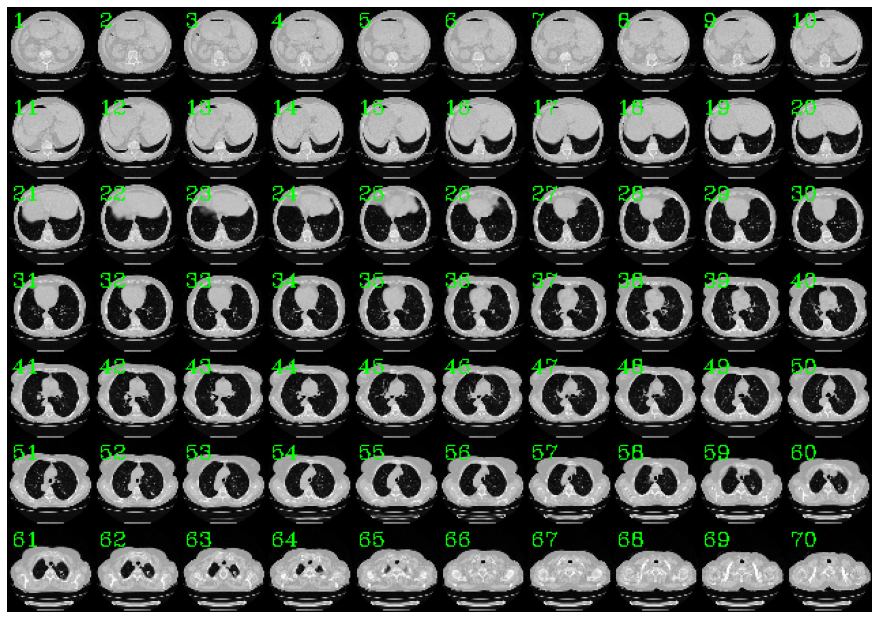

In [10]:
# Visualize montage of slices.
import cv2
plot_slices(7, 10, 224, 224, 1, image)

### Save patient names for final submission

In [11]:
names = []

for name in PATIENT_NAMES:
    names.append(name[:-7])

names[:5]

['TST_0001', 'TST_0002', 'TST_0003', 'TST_0004', 'TST_0005']

In [14]:
import pickle
with open("../dataset/patient_names.txt", "wb") as fp:
    pickle.dump(names, fp)

In [15]:
with open("../dataset/patient_names.txt", "rb") as fp:
    names = pickle.load(fp)